# DS-SF-36 | 08 | Linear Regression | Codealong | Starter Code

In [1]:
import os

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

In [136]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'dataset-08-zillow.csv'), index_col = 'ID')

df = read_dataset()

In [28]:
# TODO
df[~np.isnan(df.Size)]



,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.000550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,0.001430,0.002435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,0.002040,0.003920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,0.001060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,0.001299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.000264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.000691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,0.001738,0.002299,1976.0


## Scale `Size` and `LotSize` from sqft to '1,000 sqft'

In [4]:
def scale_variables(df):
    df.Size /= 10 ** 3 # Size in 1,000 sqft
    df.LotSize /= 10 ** 3 # Lot size in 1,000 sqft

scale_variables(df)

In [4]:
df[ ['Size', 'LotSize'] ]

,Size,LotSize
ID,,
15063471,0.550,NaN
15063505,1.430,2.435
15063609,2.040,3.920
15064044,1.060,NaN
15064257,1.299,NaN
...,...,...
2124214951,0.264,NaN
2126960082,0.691,NaN
2128308939,1.738,2.299


## Part A | Linear Regression with _statsmodels_' `OLS`

- (http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html)

### `SalePrice` as a function of `Size`

In [29]:
def Xy(df):
   
    
    # TODO: X
    X = df["Size"]
    # TODO: y
    y = df["SalePrice"]

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sun, 23 Jul 2017   Prob (F-statistic):          7.83e-177
Time:                        14:56:37   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size         817.6357     23.080     35.426      0.000       772.343   862.929
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` - Take 2

In [152]:
def Xy_2(df):
    df = df[~np.isnan(df.Size)]
    # TODO: X
    X = df["Size"]
    # TODO: y

    return X, y

X, y = Xy_2(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sun, 23 Jul 2017   Prob (F-statistic):          7.83e-177
Time:                        16:07:25   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.8176      0.023     35.426      0.000         0.772     0.863
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
df.Size.size
np.ones(df.Size.size).size


1000

### `SalePrice` as a function of `Size` - Take 3

- (http://statsmodels.sourceforge.net/devel/generated/statsmodels.tools.tools.add_constant.html)

In [76]:
def Xy_3(df):
    df = df[~np.isnan(df.Size)]
    # TODO: X
    X = df.Size
    X = sm.add_constant(X)
    # TODO: y
    y = df.SalePrice

    return X, y

X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           2.67e-58
Time:                        15:34:31   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size         749.7281     43.473     17.246      0.000       664.415   835.041
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         974.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making predictions

In [77]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]}, columns = ['Size'])
predict_X = sm.add_constant(predict_X)

In [78]:
predict_X

,const,Size
0,1,1.2
1,1,1.4
2,1,1.6


In [79]:
predict_y = model.predict(predict_X)

In [80]:
predict_y

array([  899.82876237,  1049.7743808 ,  1199.71999924])

In [81]:
type(predict_y)

numpy.ndarray

### Model's parameters

In [82]:
model.params

const      0.155052
Size     749.728092
dtype: float64

### t-values

In [83]:
model.tvalues

const     1.842394
Size     17.245775
dtype: float64

### p-values

In [84]:
model.pvalues

const    6.572416e-02
Size     2.667697e-58
dtype: float64

### Confidence Intervals

In [85]:
model.conf_int(alpha = .05).\
    rename(columns = {0: '2.5%', 1: '97.5%'})

,2.5%,97.5%
const,-0.010102,0.320205
Size,664.415292,835.040893


## Part B | The 68 - 90 - 95 - 99.7 Rule

- (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [ ]:
# TODO

In [88]:
print ("For normally distributed data:")
for z in [1, 1.65, 2, 3]:
    print ("\t- {:3.2f}% of it is between +/- {:1.2f} sigma(s)".\
        format((stats.norm.cdf(z) - stats.norm.cdf(-z)) * 100, z))

For normally distributed data:
	- 68.27% of it is between +/- 1.00 sigma(s)
	- 90.11% of it is between +/- 1.65 sigma(s)
	- 95.45% of it is between +/- 2.00 sigma(s)
	- 99.73% of it is between +/- 3.00 sigma(s)


> ### `norm.ppf` (percent point function) is the  inverse of `norm.cdf`:

In [89]:
stats.norm.ppf(stats.norm.cdf(1))

1.0

> ### $\sigma$ for the 90% rule?

In [101]:
df.head()
df[]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.71,0.0,1.0,NaN,0.000550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.15,0.0,NaN,2.0,0.001430,0.002435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.60,0.0,2.0,3.5,0.002040,0.003920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.50,0.0,1.0,1.0,0.001060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.97,0.0,2.0,2.0,0.001299,NaN,1993.0


## Part C | Linear Regression with _statsmodels_' `ols`

- (http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/formulas.html)

In [104]:
# TODO
from statsmodels.formula.api import ols
df_1 = df[["SalePrice","Size"]].dropna()
model = ols(formula='SalePrice ~ Size', data=df)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           2.67e-58
Time:                        15:43:45   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.0

### `SalePrice` as a function of `Size` without `Intercept`

In [107]:
# TODO
df_1 = df[["SalePrice","Size"]].dropna()
model = ols(formula='SalePrice ~ Size - 1', data=df)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Sun, 23 Jul 2017   Prob (F-statistic):          7.83e-177
Time:                        15:46:01   Log-Likelihood:                -1689.6
No. Observations:                 967   AIC:                             3381.
Df Residuals:                     966   BIC:                             3386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size         817.6357     23.080     35.426      0.0

### Dropping outliers

In [137]:
def drop_outliers(df):
    print ('Dropping outliers')
    df = df[["SalePrice","Size"]].dropna()

    print ('- n (before) =', df.shape[0])

    # TODO
    Q1 = df.SalePrice.quantile(.25)
    Q2 = df.SalePrice.quantile(.5)
    Q3 = df.SalePrice.quantile(.75)

    print ('- Q1         =', Q1, '($M)')
    print ('- Q2/Median  =', Q2, '($M)')
    print ('- Q3         =', Q3, '($M)')

    # TODO
    df = df[df.SalePrice < Q3 + 1.5 * (Q3-Q1)]
    df = df[df.SalePrice > Q1 - 1.5 * (Q3-Q1)]
    print ('- n (after)  =', df.shape[0])
    
    return df

df = drop_outliers(df)


Dropping outliers
- n (before) = 967
- Q1         = 0.8099999999999999 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.55 ($M)
- n (after)  = 904


In [139]:
df


,SalePrice,Size
ID,,
15063471,0.710,550.0
15063505,2.150,1430.0
15064044,1.500,1060.0
15064257,0.970,1299.0
15064295,0.940,1033.0
...,...,...
2124214951,0.390,264.0
2126960082,0.860,691.0
2128308939,0.830,1738.0


### `SalePrice` as a function of `Size` (again)

In [138]:

model = ols(formula='SalePrice ~ Size', data=df)
res = model.fit()
print(res.summary())




                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     224.8
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           1.54e-45
Time:                        15:59:06   Log-Likelihood:                -565.19
No. Observations:                 904   AIC:                             1134.
Df Residuals:                     902   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7081      0.032     22.045      0.0

## Part D | Checking modeling assumptions

In [140]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

### Are the residuals normally distributed?

In [143]:
# TODO
model.resid


ID
15063471     -0.151798
15063505      1.042226
15064044      0.495648
15064257     -0.101157
15064295     -0.056805
                ...   
2124214951   -0.391856
2126960082   -0.041210
2128308939   -0.363865
2131957929   -0.165998
2136213970   -0.134629
dtype: float64

### Are the residuals normally distributed?  `.qqplot()`

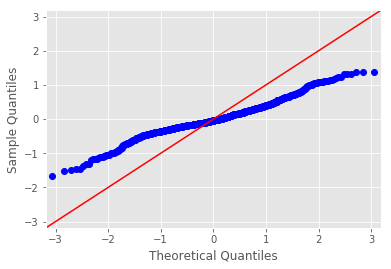

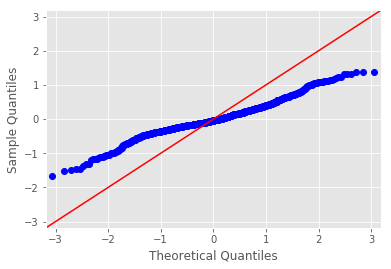

In [146]:
sm.qqplot(model.resid, line = '45')

### Are x and $\varepsilon$ independent?  `.plot_regress_exog()`

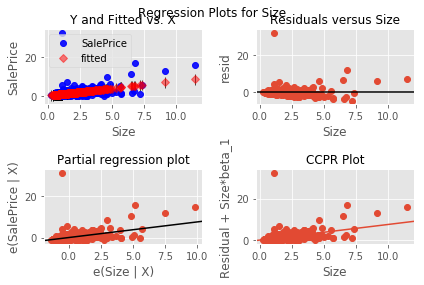

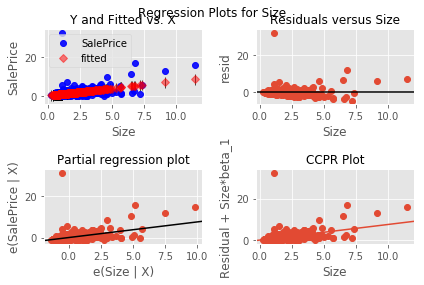

In [178]:
import statsmodels
statsmodels.graphics.regressionplots.plot_regress_exog(model ,'Size')

In [175]:
model

AttributeError: 'OLSResults' object has no attribute 'attribute'

## Part E | Model's Fit and $R^2$

In [147]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # rescale the variables (use the function defined above)

### $SalePrice = \beta_0 + \beta_1 \times Size$

In [148]:
X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           2.67e-58
Time:                        16:06:50   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
model.rsquared

0.23559317159970783

In [150]:
y_hat = model.predict(X)

var_y_hat = sum((y - y_hat) ** 2)
var_y = sum((y - y.mean()) ** 2)

1 - var_y_hat / var_y

0.23559317159970872

### $SalePrice = \beta_1 \times Size$

In [153]:
X, y = Xy_2(df)

model = smf.OLS(y, X).fit()

model.rsquared

0.56506068149064204

> #### Is it real?

In [154]:
y_hat = model.predict(X)

In [155]:
1 - sum((y - y_hat) ** 2) / sum((y - y.mean()) ** 2)

0.23290434806246241

## Part F | Calculating the t-value, p-value, and confidence interval for `Intercept`

- (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

### $SalePrice = \beta_0 + \beta_1 \times Size$

In [156]:
X, y = Xy_3(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Sun, 23 Jul 2017   Prob (F-statistic):           2.67e-58
Time:                        16:07:53   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Given the coefficient $\beta_0$ and the standard error $SE_{\beta_0}$

In [158]:
print (model.params.const)
print (model.bse.const)

0.15505177276
0.0841577678007


> ### $t\text{-}value_{\beta_0}$:

In [159]:
model.tvalues.const

1.8423940749846963

In [ ]:
# TODO

> ### $p\text{-}value_{\beta_0}$:

In [160]:
model.pvalues.const

0.065724161073172721

In [161]:
print ('Degrees of freedom (df):', model.df_resid)

Degrees of freedom (df): 965.0


In [ ]:
# TODO

> ### $CI_{\beta_0}$:

In [162]:
model.conf_int().T.const

0   -0.010102
1    0.320205
Name: const, dtype: float64

In [ ]:
# TODO

> ### (We can also calculate $SE_{\beta_0}$:)

In [163]:
model.bse.const

0.084157767800735972

In [164]:
XTX_1 = np.linalg.inv(np.dot(X.T, X))

XTX_1

array([[ 0.00367802, -0.00161086],
       [-0.00161086,  0.00098145]])

In [165]:
v0 = XTX_1[0, 0]

v0

0.0036780244187160317

In [166]:
sigma_hat = np.sqrt(1. / model.df_resid * (y ** 2 - y_hat ** 2).sum())

In [167]:
np.sqrt(v0) * sigma_hat

0.084305651582210359